Name: Zihan Qin

Github: zihan-qin

USCID: 8130 9206 33

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,Lasso
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error
import xgboost

In [2]:
!pip list

Package                       Version
----------------------------- ---------
appnope                       0.1.2
argon2-cffi                   20.1.0
async-generator               1.10
attrs                         21.2.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
beniget                       0.4.1
bleach                        4.1.0
bootstrapped                  0.0.2
boto3                         1.19.2
botocore                      1.22.2
brotlipy                      0.7.0
certifi                       2021.10.8
cffi                          1.14.6
chardet                       4.0.0
charset-normalizer            2.0.0
colorama                      0.4.4
conda                         4.10.3
conda-package-handling        1.7.3
cryptography                  3.4.7
cycler                        0.10.0
Cython                        0.29.24
debugpy                       1.4.1
decorator                     5.0.9
defusedxml                    0.7.1
entrypoint

1. Decision Trees as Interpretable Models

(a) Download the Accute Inflamations data from https://archive.ics.uci.edu/ ml/datasets/Acute+Inflammations.

(b) Build a decision tree on the whole data set and plot it.

In [3]:
diagnosis =pd.read_csv(
    '../Data/diagnosis.data',
    encoding='utf_16',
    sep='\t',
    decimal=',',
    header=None,
    names=[
        'Temperature_of_patient',
        'Occurrence_of_nausea',
        'Lumbar_pain',
        'Urine_pushing_continuous_need_for_urination',
        'Micturition_pains',
        'Burning_of_urethra_itch_swelling_of_urethra_outlet',
        'Decision_Inflammation_of_urinary_bladder',
        'Decision_Nephritis_of_renal_pelvis_origin'
        ])

In [4]:
for i in range(diagnosis.shape[0]):
    for j in range(diagnosis.shape[1]):
        if diagnosis.iloc[i,j] == 'yes':
            diagnosis.iloc[i,j] = 1
        elif diagnosis.iloc[i,j] == 'no':
            diagnosis.iloc[i,j] = 0

In [5]:
diagnosis

,Temperature_of_patient,Occurrence_of_nausea,Lumbar_pain,Urine_pushing_continuous_need_for_urination,Micturition_pains,Burning_of_urethra_itch_swelling_of_urethra_outlet,Decision_Inflammation_of_urinary_bladder,Decision_Nephritis_of_renal_pelvis_origin
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
115,41.4,0,1,1,0,1,0,1
116,41.5,0,0,0,0,0,0,0
117,41.5,1,1,0,1,0,0,1
118,41.5,0,1,1,0,1,0,1


In [6]:
diag_y = diagnosis.loc[:,['Decision_Inflammation_of_urinary_bladder','Decision_Nephritis_of_renal_pelvis_origin']].astype('int')
diag_x = diagnosis.drop(['Decision_Inflammation_of_urinary_bladder','Decision_Nephritis_of_renal_pelvis_origin'],axis=1).astype('float')

In [7]:
feature_names = range(len(diag_x.columns))
target_names = range(len(diag_y.columns))

In [8]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt = dt.fit(np.array(diag_x),np.array(diag_y))


In [9]:
dt.score(diag_x,diag_y)

/Users/zihanqin/miniforge3/lib/python3.9/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


1.0

[Text(133.92000000000002, 195.696, 'X[0] <= 37.95\nentropy = 0.99\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(66.96000000000001, 152.208, 'X[2] <= 0.5\nentropy = 0.459\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(33.480000000000004, 108.72, 'entropy = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(100.44000000000001, 108.72, 'entropy = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(200.88000000000002, 152.208, 'X[2] <= 0.5\nentropy = 0.775\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(167.40000000000003, 108.72, 'entropy = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(234.36, 108.72, 'X[4] <= 0.5\nentropy = 0.479\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(200.88000000000002, 65.232, 'entropy = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(267.84000000000003, 65.232, 'X[3] <= 0.5\nentropy = 0.465\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(234.36, 21.744, 'entropy = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]')

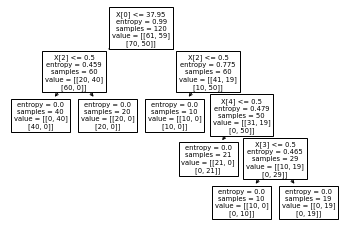

In [10]:
tree.plot_tree(dt)

(c) Convert the decision rules into a set of IF-THEN rules.


In [11]:
def tree_to_pseudo(tree, feature_names):
        left = tree.tree_.children_left
        right = tree.tree_.children_right
        threshold = tree.tree_.threshold
        features = [feature_names[i] for i in tree.tree_.feature]
        value = tree.tree_.value
        def recurse(left, right, threshold, features, node, depth=0): 
                indent=" "*depth
                if (threshold[node] != -2):
                    print(indent,"if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
                    if left[node] != -1:
                        recurse (left, right, threshold, features, left[node], depth+1)
                        print(indent,"} else {")
                        if right[node] != -1:
                            recurse (left, right, threshold, features, right[node], depth+1)
                        print(indent,"}")
                else:
                    print(indent,"return " + str(value[node]))
        recurse(left, right, threshold, features, 0)

In [12]:
tree_to_pseudo(dt,diag_x.columns)

 if ( Temperature_of_patient <= 37.95000076293945 ) {
  if ( Lumbar_pain <= 0.5 ) {
   return [[ 0. 40.]
 [40.  0.]]
  } else {
   return [[20.  0.]
 [20.  0.]]
  }
 } else {
  if ( Lumbar_pain <= 0.5 ) {
   return [[10.  0.]
 [10.  0.]]
  } else {
   if ( Micturition_pains <= 0.5 ) {
    return [[21.  0.]
 [ 0. 21.]]
   } else {
    if ( Urine_pushing_continuous_need_for_urination <= 0.5 ) {
     return [[10.  0.]
 [ 0. 10.]]
    } else {
     return [[ 0. 19.]
 [ 0. 19.]]
    }
   }
  }
 }


(d) Use cost-complexity pruning to find a minimal decision tree and a set of decision rules with high interpretability.

In [13]:
param = {'ccp_alpha':[0,np.exp(-5),np.exp(-3),np.exp(-2),np.exp(-1),1]}
dt = tree.DecisionTreeClassifier()
clf = GridSearchCV(dt,param)
clf.fit(np.array(diag_x),np.array(diag_y))
clf.best_params_

{'ccp_alpha': 0}

Since the best alpha is 0, the minimal decision tree with cost-complexity pruning will be the same as the original full tree. So the interpretation will be same as above interpretation for the full tree.

**2**

(a) Download the Communities and Crime data3 from https://archive.ics.uci. edu/ml/datasets/Communities+and+Crime. Use the first 1495 rows of data as the training set and the rest as the test set.

(b) The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features.

(c) Plot a correlation matrix for the features in the data set.

In [14]:
comm_cols=['state','county','community','communityname','fold','population','householdsize','racepctblack','racePctWhite','racePctAsian','racePctHisp','agePct12t21','agePct12t29','agePct16t24','agePct65up','numbUrban','pctUrban','medIncome','pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst','pctWRetire','medFamInc','perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap','OtherPerCap','HispPerCap','NumUnderPov','PctPopUnderPov','PctLess9thGrade','PctNotHSGrad','PctBSorMore','PctUnemployed','PctEmploy','PctEmplManu','PctEmplProfServ','PctOccupManu','PctOccupMgmtProf','MalePctDivorce','MalePctNevMarr','FemalePctDiv','TotalPctDiv','PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par','PctTeen2Par','PctWorkMomYoungKids','PctWorkMom','NumIlleg','PctIlleg','NumImmig','PctImmigRecent','PctImmigRec5','PctImmigRec8','PctImmigRec10','PctRecentImmig','PctRecImmig5','PctRecImmig8','PctRecImmig10','PctSpeakEnglOnly','PctNotSpeakEnglWell','PctLargHouseFam','PctLargHouseOccup','PersPerOccupHous','PersPerOwnOccHous','PersPerRentOccHous','PctPersOwnOccup','PctPersDenseHous','PctHousLess3BR','MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded','PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal','OwnOccHiQuart','RentLowQ','RentMedian','RentHighQ','MedRent','MedRentPctHousInc','MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet','PctForeignBorn','PctBornSameState','PctSameHouse85','PctSameCity85','PctSameState85','LemasSwornFT','LemasSwFTPerPop','LemasSwFTFieldOps','LemasSwFTFieldPerPop','LemasTotalReq','LemasTotReqPerPop','PolicReqPerOffic','PolicPerPop','RacialMatchCommPol','PctPolicWhite','PctPolicBlack','PctPolicHisp','PctPolicAsian','PctPolicMinor','OfficAssgnDrugUnits','NumKindsDrugsSeiz','PolicAveOTWorked','LandArea','PopDens','PctUsePubTrans','PolicCars','PolicOperBudg','LemasPctPolicOnPatr','LemasGangUnitDeploy','LemasPctOfficDrugUn','PolicBudgPerPop','ViolentCrimesPerPop']

In [15]:
comm =pd.read_csv('../Data/communities.data',sep=',',header=None,names=comm_cols)

In [16]:
comm

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [17]:
comm = comm.drop(['state','county','community','communityname','fold'],axis=1)

In [18]:
x_train = comm.loc[:1494,]
x_test = comm.loc[1495:,]

In [19]:
missing_count = (x_train=='?').sum(axis=0).sort_values(ascending=False)
missing_count[missing_count!=0]

PolicReqPerOffic        1256
PctPolicMinor           1256
LemasSwornFT            1256
LemasSwFTPerPop         1256
LemasSwFTFieldOps       1256
LemasSwFTFieldPerPop    1256
LemasTotalReq           1256
LemasTotReqPerPop       1256
PolicPerPop             1256
RacialMatchCommPol      1256
PctPolicWhite           1256
PctPolicBlack           1256
PctPolicAsian           1256
PctPolicHisp            1256
OfficAssgnDrugUnits     1256
PolicCars               1256
PolicBudgPerPop         1256
LemasGangUnitDeploy     1256
LemasPctPolicOnPatr     1256
NumKindsDrugsSeiz       1256
PolicOperBudg           1256
PolicAveOTWorked        1256
OtherPerCap                1
dtype: int64

In [20]:
missing_count = (x_test=='?').sum(axis=0).sort_values(ascending=False)
missing_count[missing_count!=0]

PolicPerPop             419
PctPolicMinor           419
LemasSwornFT            419
LemasSwFTPerPop         419
LemasSwFTFieldOps       419
LemasSwFTFieldPerPop    419
LemasTotalReq           419
LemasTotReqPerPop       419
PolicReqPerOffic        419
RacialMatchCommPol      419
PctPolicWhite           419
PctPolicBlack           419
PctPolicHisp            419
PctPolicAsian           419
OfficAssgnDrugUnits     419
PolicOperBudg           419
PolicBudgPerPop         419
LemasGangUnitDeploy     419
LemasPctPolicOnPatr     419
PolicCars               419
PolicAveOTWorked        419
NumKindsDrugsSeiz       419
dtype: int64

In [21]:
for i in x_train:
    imp = np.mean([float(j) for j in x_train[i] if j != '?'])
    x_train[i] = x_train[i].replace('?',imp)
    x_test[i] = x_test[i].replace('?',imp)

/var/folders/fz/lh52g2xn5_ngth9ccrfqp8sw0000gn/T/ipykernel_8726/3643967078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[i] = x_train[i].replace('?',imp)
/var/folders/fz/lh52g2xn5_ngth9ccrfqp8sw0000gn/T/ipykernel_8726/3643967078.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[i] = x_test[i].replace('?',imp)


In [22]:
y_train = x_train['ViolentCrimesPerPop']
x_train = x_train.drop('ViolentCrimesPerPop',axis=1)
y_test = x_test['ViolentCrimesPerPop']
x_test = x_test.drop('ViolentCrimesPerPop',axis=1)

In [23]:
comm_whole = pd.concat([x_train,x_test])
target_whole = pd.concat([y_train,y_test])

In [24]:
target_whole

0       0.20
1       0.67
2       0.43
3       0.12
4       0.03
        ... 
1989    0.09
1990    0.45
1991    0.23
1992    0.19
1993    0.48
Name: ViolentCrimesPerPop, Length: 1994, dtype: float64

                     population  householdsize  racepctblack  racePctWhite  \
population             1.000000      -0.046148      0.231178     -0.300845   
householdsize         -0.046148       1.000000     -0.067109     -0.235907   
racepctblack           0.231178      -0.067109      1.000000     -0.794389   
racePctWhite          -0.300845      -0.235907     -0.794389      1.000000   
racePctAsian           0.181603       0.201996     -0.106738     -0.270266   
...                         ...            ...           ...           ...   
PctSameState85        -0.089638      -0.003277     -0.002894      0.032415   
LandArea               0.713652      -0.015078      0.149758     -0.131389   
PopDens                0.231897      -0.004072      0.095053     -0.337458   
PctUsePubTrans         0.270356      -0.051506      0.147023     -0.215636   
LemasPctOfficDrugUn    0.466352      -0.094368      0.260793     -0.276234   

                     racePctAsian  racePctHisp  agePct12t21  ag

<function matplotlib.pyplot.show(close=None, block=None)>

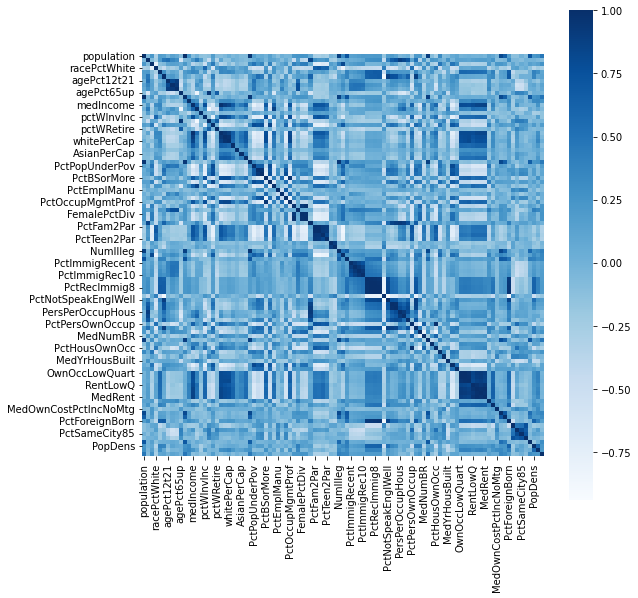

In [25]:
corr_matrix = comm_whole.corr()
print(corr_matrix)
plt.subplots(figsize=(9,9))
sns.heatmap(corr_matrix, vmax=1, square=True, cmap='Blues')
plt.show

(d) Calculate the Coefficient of Variation CV for each feature, where CV = $\frac{m}{s}$, in which s is sample standard deviation and m is sample mean.

(e) Pick $\lfloor \sqrt{128} \rfloor$ features with highest CV , and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?

In [26]:
agg = comm_whole.agg(['std','mean'],axis=0)
cv = (agg.iloc[0]/agg.iloc[1]).sort_values(ascending=False)
cv

NumStreet              4.407702
NumInShelters          3.485481
NumIlleg               2.994196
NumImmig               2.900497
LemasPctOfficDrugUn    2.555266
                         ...   
PersPerFam             0.316955
PctSameState85         0.304240
agePct12t29            0.290693
PctSpeakEnglOnly       0.288673
PctHousOccup           0.269647
Length: 99, dtype: float64

In [27]:
comm_cv = comm_whole[cv[:int(np.floor(np.sqrt(128)))].index]

In [28]:
print("The 11 features with the highest CV are :", list(comm_cv.columns))

The 11 features with the highest CV are : ['NumStreet', 'NumInShelters', 'NumIlleg', 'NumImmig', 'LemasPctOfficDrugUn', 'NumUnderPov', 'population', 'numbUrban', 'HousVacant', 'LandArea', 'racePctHisp']


/Users/zihanqin/miniforge3/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


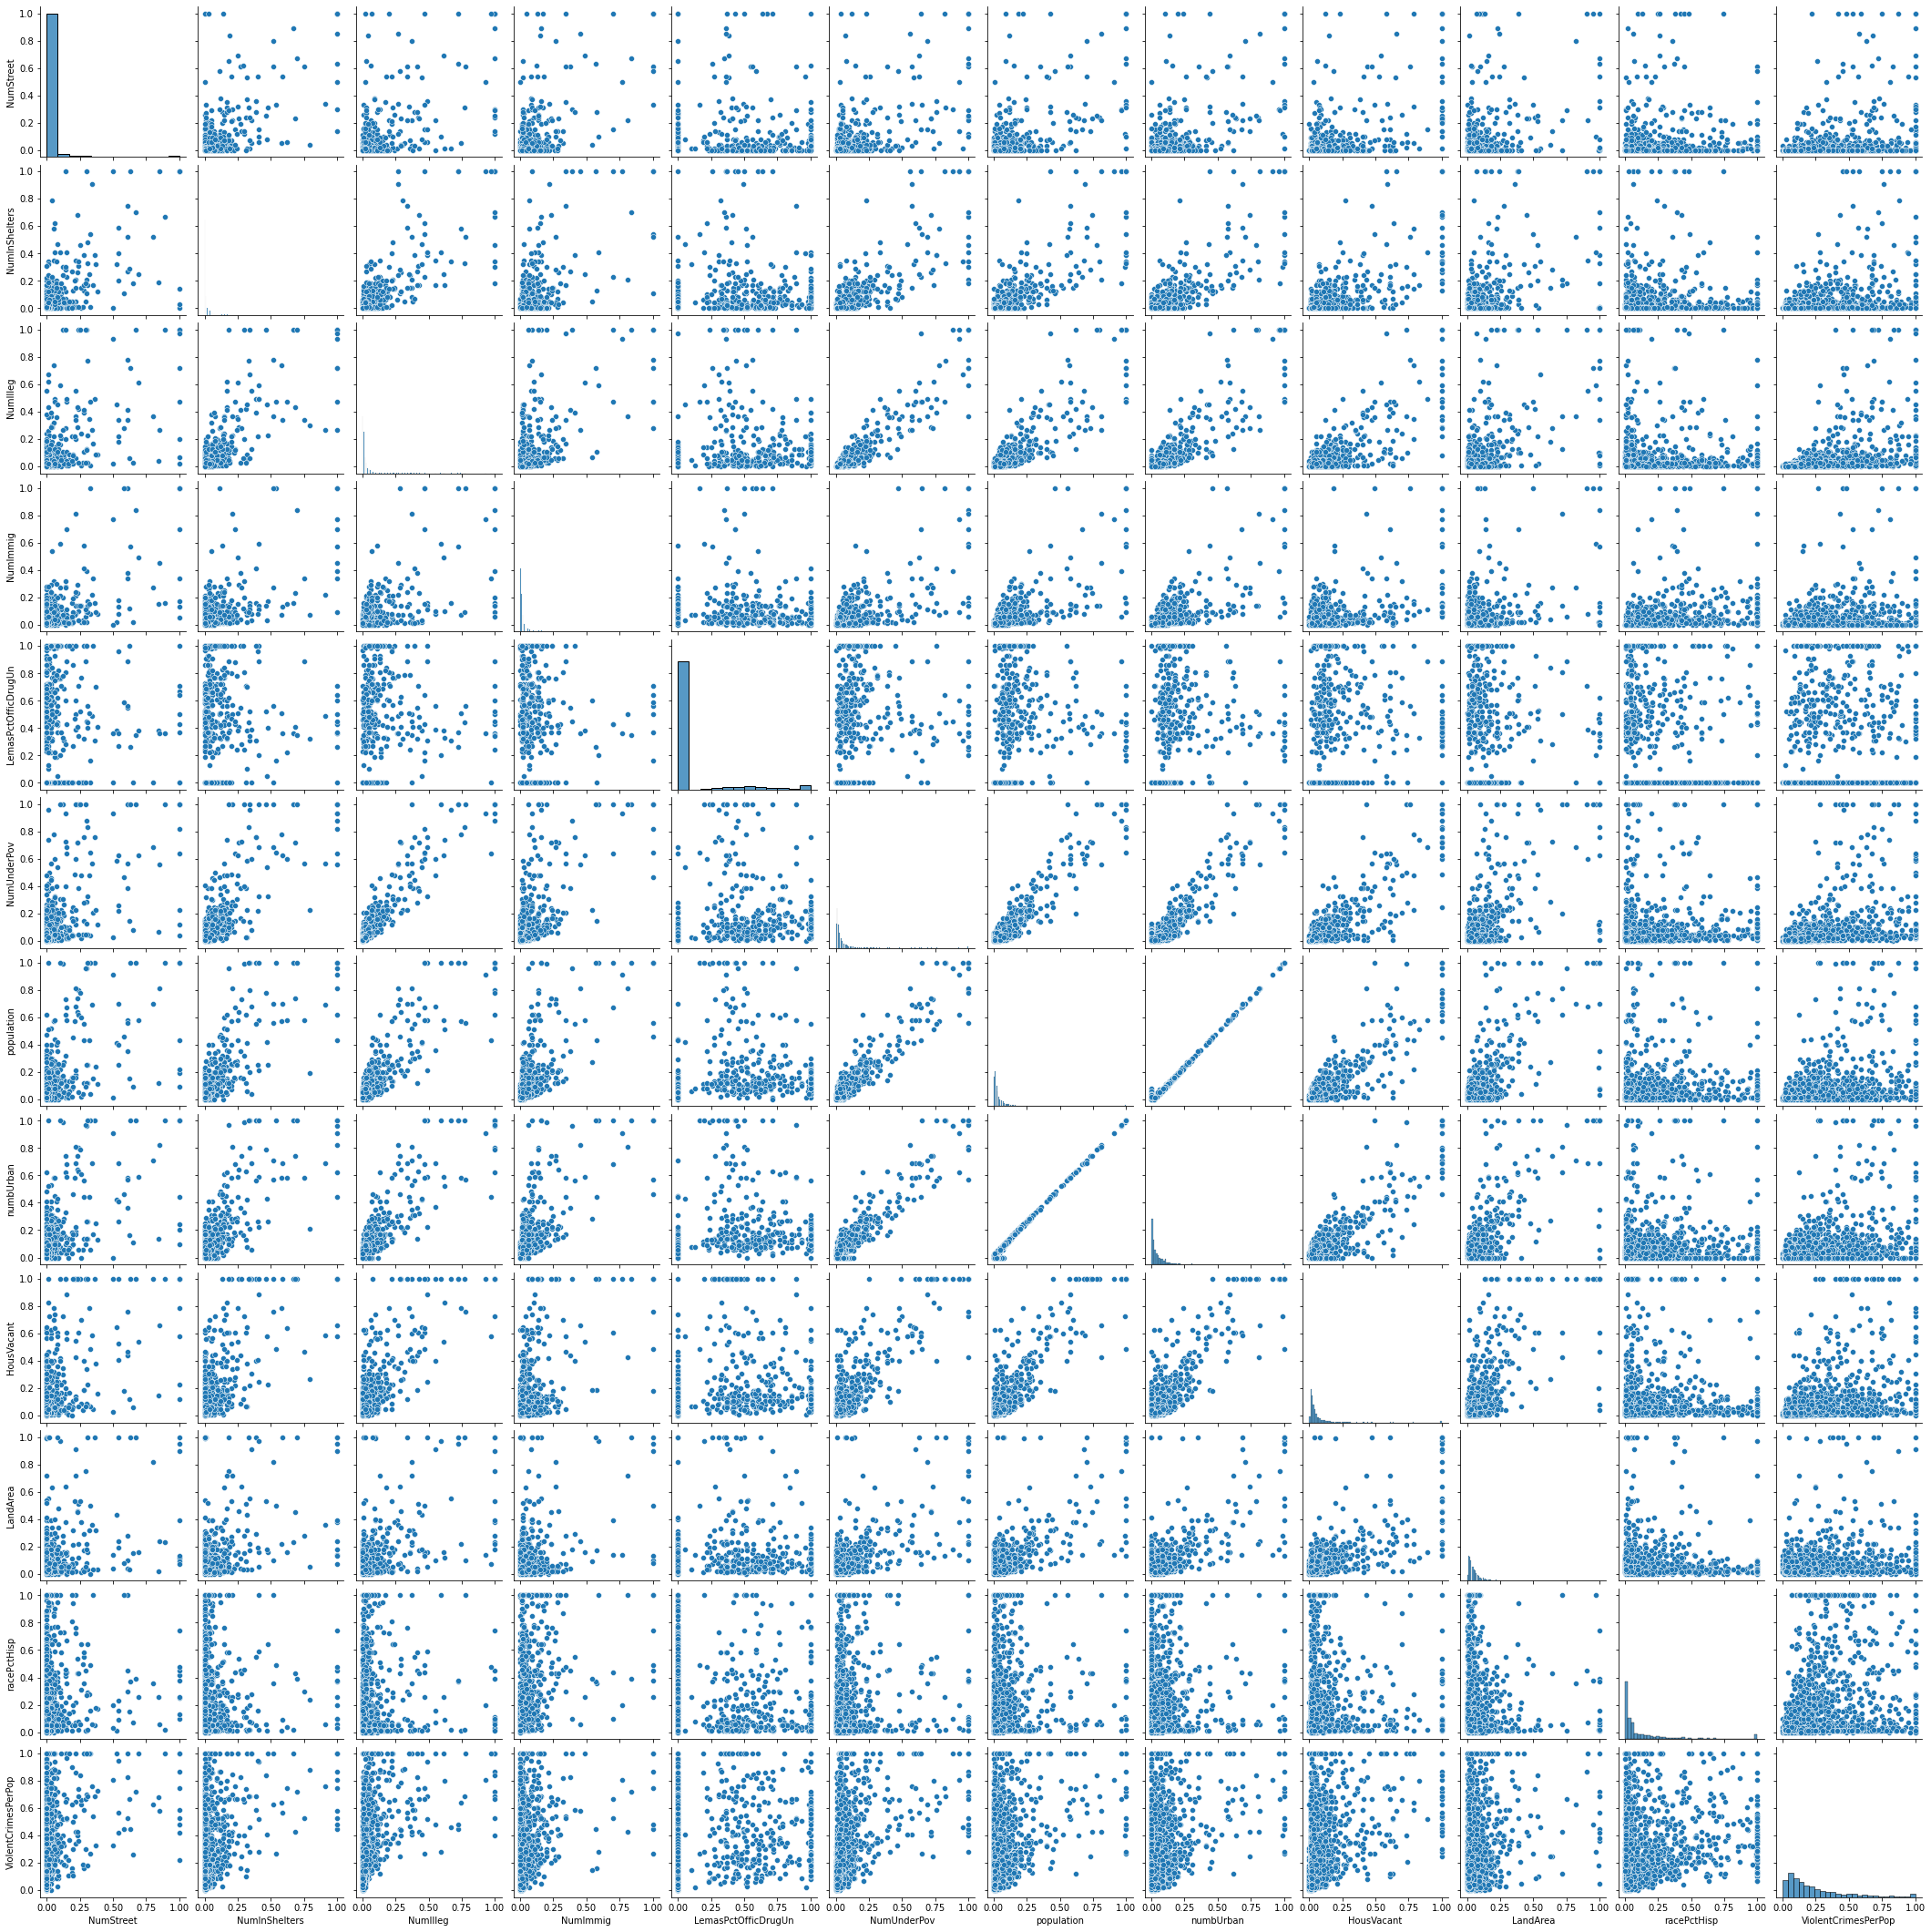

In [29]:
comm_cv.loc[:,'ViolentCrimesPerPop'] = target_whole
sns.pairplot(comm_cv)

Although there are lots of data approximate 0 in this 11 features. NumStreet, NumInShelters, Numllleg are more likely to be significant.

There is a strong positive correlation between population and numbUrban.

The major features follow heavy-tailed distribution.

[Text(0, 0, 'NumStreet'),
 Text(1, 0, 'NumInShelters'),
 Text(2, 0, 'NumIlleg'),
 Text(3, 0, 'NumImmig'),
 Text(4, 0, 'LemasPctOfficDrugUn'),
 Text(5, 0, 'NumUnderPov'),
 Text(6, 0, 'population'),
 Text(7, 0, 'numbUrban'),
 Text(8, 0, 'HousVacant'),
 Text(9, 0, 'LandArea'),
 Text(10, 0, 'racePctHisp'),
 Text(11, 0, 'ViolentCrimesPerPop')]

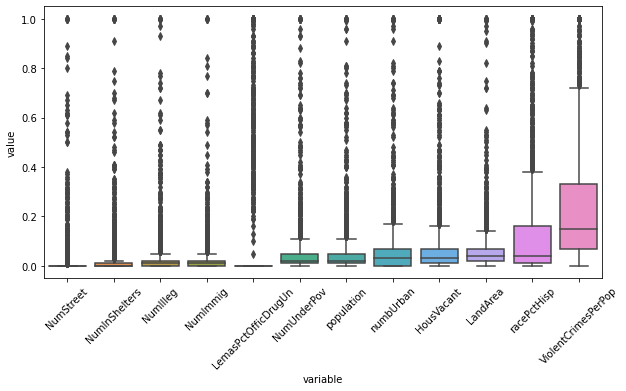

In [30]:
plt.figure(figsize=[10,5])
ax = sns.boxplot(data = comm_cv.melt(),x='variable',y='value')
ax.set_xticklabels(labels=comm_cv.columns,rotation=45,fontsize=10)

(f) Fit a linear model using least squares to the training set and report the test error.


In [31]:
lr = LinearRegression()
lr = lr.fit(x_train,y_train)
print('test error:',round(mean_squared_error(y_test,lr.predict(x_test)),4))

test error: 5.7131011322101306e+17


(g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [32]:
rcv = RidgeCV(cv=5)
rcv = rcv.fit(x_train,y_train)
print('test error:',round(mean_squared_error(y_test,rcv.predict(x_test)),4))

test error: 0.0177


In [33]:
print('lambda:',rcv.alpha_)

1.0



(h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized features. Report the test error for both cases and compare them.

In [34]:
lcv = LassoCV(cv=5,random_state=10,max_iter=1500)
lcv = lcv.fit(x_train,y_train)
print('test error:',round(mean_squared_error(y_test,lcv.predict(x_test)),4))


test error: 0.0178


In [35]:
print('lasso alpha:',round(lcv.alpha_,4))

lasso alpha: 0.0001


In [36]:
lasso_alpha = lcv.alphas_

In [37]:
lcv.feature_names_in_[lcv.coef_!=0]

array(['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29',
       'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec',
       'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap',
       'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap',
       'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'PctEmplManu',
       'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv',
       'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom',
       'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec10',
       'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup',
       'PersPerOccupHous', 'PctPersOwnOccup', 'PctPersDenseHous',
       'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup',
       'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt',
       'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'RentLowQ',
       'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc',
       'MedOwnCostPctIncNoMtg', 'NumInShelters', 

In [38]:
x_train.index = range(len(x_train))
y_train.index = range(len(y_train))
lasso_score = {}
for a in lasso_alpha:
    tmp = []
    kf = KFold(n_splits=5,shuffle=True,random_state=10)
    for train_index, test_index in kf.split(x_train):
        cv_train, cv_test = np.array(x_train)[train_index], np.array(x_train)[test_index]
        cvy_train, cvy_test = np.array(y_train)[train_index], np.array(y_train)[test_index]
        sc = StandardScaler()
        sc.fit(cv_train)
        cvs_train = sc.transform(cv_train)
        cvs_test = sc.transform(cv_test)
        llr = Lasso(alpha=a,max_iter=5000).fit(cvs_train,cvy_train)
        tmp.append(llr.score(cvs_test,cvy_test))
        lasso_score[a] = np.mean(tmp)
    

In [39]:
best_lasso = sorted(lasso_score.items(),key=lambda x:x[1],reverse=True)[0]
print('alpha:',round(best_lasso[0],4),'score:',round(best_lasso[1],4))

alpha: 0.0038 score: 0.6524


In [40]:
llr = Lasso(alpha=best_lasso[0])
sc = StandardScaler().fit(x_train)
xs_train = pd.DataFrame(sc.transform(x_train),columns=x_train.columns)
xs_test = pd.DataFrame(sc.transform(x_test),columns=x_train.columns)
llr = llr.fit(xs_train,y_train)
print('test error:',round(mean_squared_error(y_test,llr.predict(xs_test)),4))


test error: 0.0175


In [41]:
llr.feature_names_in_[llr.coef_!=0]

array(['racepctblack', 'racePctWhite', 'agePct12t29', 'pctUrban',
       'pctWInvInc', 'pctWPubAsst', 'pctWRetire', 'indianPerCap',
       'AsianPerCap', 'OtherPerCap', 'MalePctDivorce', 'PctKids2Par',
       'PctYoungKids2Par', 'PctWorkMom', 'PctIlleg', 'PctPersDenseHous',
       'PctHousLess3BR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded',
       'PctVacMore6Mos', 'MedRentPctHousInc', 'MedOwnCostPctIncNoMtg',
       'NumStreet', 'PctForeignBorn', 'PctSameCity85',
       'LemasTotReqPerPop', 'PolicReqPerOffic', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop'],
      dtype=object)

As above metioned, The best alpha of model with standardized features(alpha = 0.0038) are larger than normalized features(alpha=0.0001), and the model has less features. The lasso model with standardized features(mse=0.0175) also has better performance in test data set(0.0178).


(i) Fit a PCR model on the training set, with M (the number of principal compo- nents) chosen by cross-validation. Report the test error obtained.

In [42]:
x_train.index = range(len(x_train))
y_train.index = range(len(y_train))
pca_score = {}
for num in range(1,20,2):
    tmp = []
    kf = KFold(n_splits=5,shuffle=True,random_state=10)
    for train_index, test_index in kf.split(x_train):
        cv_train, cv_test = np.array(x_train)[train_index], np.array(x_train)[test_index]
        cvy_train, cvy_test = np.array(y_train)[train_index], np.array(y_train)[test_index]
        pca = PCA(n_components=num)
        pca = pca.fit(cv_train)
        pca_train = pca.transform(cv_train)
        pca_test = pca.transform(cv_test)
        pcr = LinearRegression().fit(pca_train,cvy_train)
        tmp.append(pcr.score(pca_test,cvy_test))
    pca_score[num] = np.mean(tmp)

In [43]:
pca_score

{1: 0.3273420063865923,
 3: 0.5028430885595642,
 5: 0.5893511404197913,
 7: 0.6427601084715597,
 9: 0.6431709089763809,
 11: 0.6432181675357407,
 13: 0.6448739533375704,
 15: 0.6443516745628053,
 17: 0.6413956640839477,
 19: 0.6395894917328429}

In [1]:
best_pca = sorted(pca_score.items(),key=lambda x:x[1],reverse=True)[0]
print('n_features:',best_pca[0],'score:',round(best_pca[1],3))

NameError: name 'pca_score' is not defined

In [45]:
pca = PCA(n_components=best_pca[0])
pca= pca.fit(x_train)
pca_train = pca.transform(x_train)
pca_test = pca.transform(x_test)
pcr = LinearRegression().fit(pca_train,y_train)
print('test error:',round(mean_squared_error(y_test,pcr.predict(pca_test)),4))

test error: 0.0179


(j) In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L1-penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. You can use XGBoost5 to fit the model tree. Determine α (the regularization term) using cross-validation.

In [46]:
x_train.index = range(len(x_train))
y_train.index = range(len(y_train))
l1_score = {}
for a in lasso_alpha:
    tmp = []
    kf = KFold(n_splits=5,shuffle=True,random_state=10)
    for train_index, test_index in kf.split(x_train):
        cv_train, cv_test = np.array(x_train)[train_index], np.array(x_train)[test_index]
        cvy_train, cvy_test = np.array(y_train)[train_index], np.array(y_train)[test_index]
        xgb = xgboost.XGBRegressor(reg_alpha=a).fit(cv_train,cvy_train)
        pred_test = xgb.predict(cv_test)
        tmp.append(r2_score(cvy_test,pred_test))
    l1_score[a] = np.mean(tmp)

In [47]:
best_l1 = sorted(l1_score.items(),key=lambda x:x[1],reverse=True)[0]
print('alpha:',round(best_l1[0],4),'score:',round(best_l1[1],4))

alpha: 0.0088 score: 0.6061


In [48]:
xgb = xgboost.XGBRegressor(reg_alpha=best_l1[0]).fit(np.array(x_train),np.array(y_train))
print('test error:',round(mean_squared_error(y_test,xgb.predict(x_test)),4))

test error: 0.0179
